performance should compare between duration and the utilization of the hardware. if it is utilize to the fullest (i.e. more than 80% utilization) and also duration is short.

it can be started by find the shortest duration and then continue to compare it with the longer duration to see if there is some decreasing utilization of the software. On the other hand make sure it is on the same level of difficulty which in this case might be related to level (4 or 8 or 12) or related to tile position (x and y)

it will be good if task type can be shown in scatter plot.Compare between average gpu utilization and  

In [2]:
from pymongo import MongoClient
import pandas as pd
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## load csv
#dataset_gpu = pd.read_csv('data/gpu.csv')
#dataset_application = pd.read_csv('data/application-checkpoints.csv')

In [3]:
## connect to Database
client = MongoClient()
client = MongoClient('localhost', 3306)
db = client.csv_merge

In [14]:
taskset = db.taskIds
#df = pd.DataFrame(list(taskset.find({'taskid': 'e97027d1-e243-4c43-aa83-7489b85e00b4'})))
df = pd.DataFrame(list(taskset.find()))
df.columns

Index(['_id', 'duration', 'eventName', 'startTime', 'stopTime', 'taskid'], dtype='object')

In [15]:
df_cut = df.iloc[0:1, [1,2]]
df_cut.head()

,duration,eventName
0,1013.0,Tiling


In [6]:
dataframe3 = pd.merge(df[df['eventName'] != 'TotalRender'], df[df['eventName'] == 'TotalRender'], on='taskid', how='left')
dataframe3.columns

Index(['_id_x', 'duration_x', 'eventName_x', 'startTime_x', 'stopTime_x',
       'taskid', '_id_y', 'duration_y', 'eventName_y', 'startTime_y',
       'stopTime_y'],
      dtype='object')

In [7]:
dataframe3 = dataframe3.iloc[:, [1, 2, 5, 7]]

In [8]:
def percentage_func(row):
    return (row['duration_x'] / row['duration_y']) * 100

dataframe3['percentage'] = dataframe3.apply(percentage_func, axis=1)

dataframe3.head()

,duration_x,eventName_x,taskid,duration_y,percentage
0,1013.0,Tiling,fe81b1e2-7466-4e13-8392-e3a3434421ad,48174.0,2.102794
1,2.0,Saving Config,fe81b1e2-7466-4e13-8392-e3a3434421ad,48174.0,0.004152
2,46995.0,Render,fe81b1e2-7466-4e13-8392-e3a3434421ad,48174.0,97.552622
3,1177.0,Uploading,fe81b1e2-7466-4e13-8392-e3a3434421ad,48174.0,2.443227
4,857.0,Tiling,e0f85bfc-dc64-438b-84cf-1d84cf449ba9,33365.0,2.568560


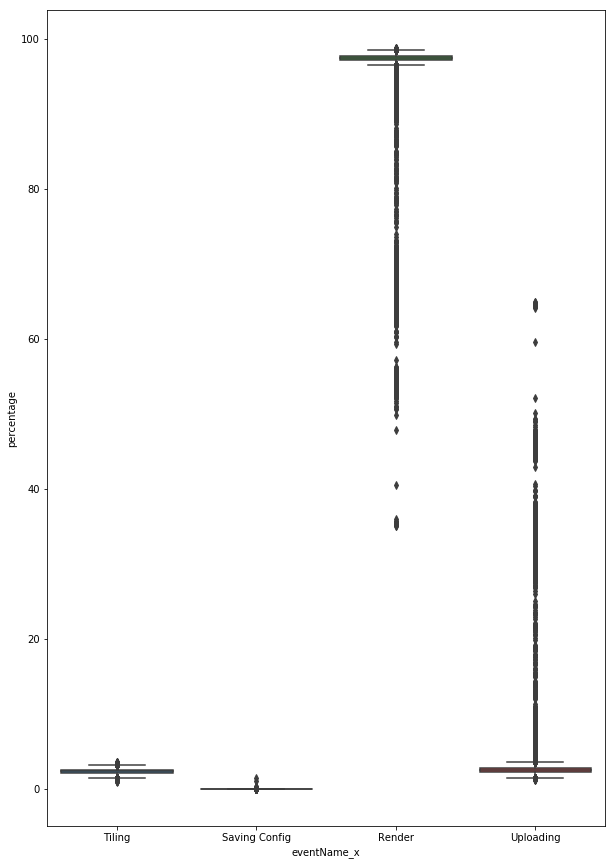

In [26]:
a4_dims = (10, 15)
fig, ax = plt.subplots(figsize=a4_dims)


sns.boxplot(ax = ax, x="eventName_x", y="percentage", data=dataframe3)

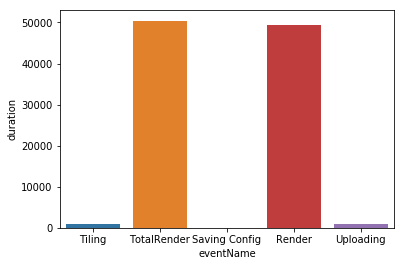

In [5]:
#sns.countplot(x='eventName', hue='duration', data=df_cut, palette="muted")

sns.barplot(x = 'eventName', y='duration', data=df_cut)

In [23]:
gpuset = db.gpu
df_gpu = pd.DataFrame(list(gpuset.find({'gpuSerial': 323217055910})))

In [29]:
df_gpu.columns

Index(['_id', 'gpuMemUtilPerc', 'gpuSerial', 'gpuTempC', 'gpuUUID',
       'gpuUtilPerc', 'hostname', 'powerDrawWatt', 'timestamp'],
      dtype='object')

In [33]:
df_gpu_cut = df_gpu.iloc[:, [1,3,5,7]]
df_gpu_cut.head()

,gpuMemUtilPerc,gpuTempC,gpuUtilPerc,powerDrawWatt
0,53,48,92,131.55
1,0,44,0,29.49
2,0,45,0,36.60
3,0,44,0,31.13
4,0,45,0,31.30


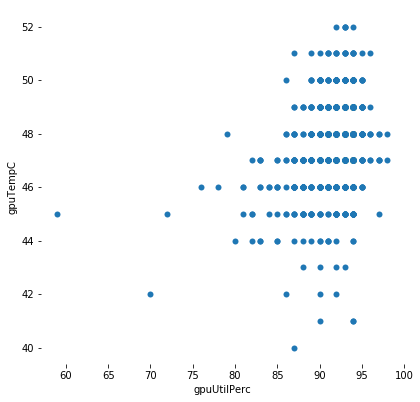

In [39]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="gpuUtilPerc", y="gpuTempC",
                palette="ch:r=-.2,d=.3_r", linewidth=0,
                data=df_gpu_cut[df_gpu_cut['gpuMemUtilPerc']>30], ax=ax)

,gpuMemUtilPerc,gpuTempC,gpuUtilPerc,powerDrawWatt
gpuMemUtilPerc,1.000000,0.729461,0.971125,0.883268
gpuTempC,0.729461,1.000000,0.731825,0.718319
gpuUtilPerc,0.971125,0.731825,1.000000,0.869507
powerDrawWatt,0.883268,0.718319,0.869507,1.000000


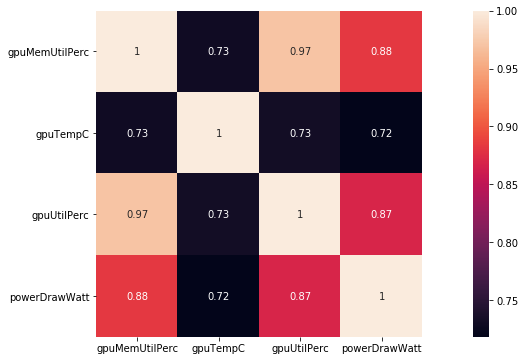

In [41]:
a4_dims = (18, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_gpu_cut.corr(), vmax=1, square=True, annot=True)
df_gpu_cut.corr()

In [4]:
task_gpu_tile_set = db.task_gpu_tile
df_task_gpu_tile = pd.DataFrame(list(task_gpu_tile_set.find({'taskid': 'e97027d1-e243-4c43-aa83-7489b85e00b4'})))

In [5]:
print(df_task_gpu_tile.columns)
print(len(df_task_gpu_tile))

Index(['_id', 'gpu', 'hostname', 'jobid', 'start', 'stop', 'taskid', 'tilexy'], dtype='object')
1


In [6]:
print(df_task_gpu_tile['gpu'])

0    [{'gpuSerial': 325017017635, 'gpuUUID': 'GPU-3...
Name: gpu, dtype: object


In [7]:
gpu_per_task = pd.DataFrame(list(df_task_gpu_tile['gpu']))

In [8]:
json1 = json.loads(gpu_per_task.to_json(orient='records'))[0]

In [9]:
test_gpu_df = pd.DataFrame(json1)
test_gpu_df = test_gpu_df.T

print (type(test_gpu_df.timestamp))

#print(datetime.strptime(test_gpu_df['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ'))

#test_gpu_df['timestamp'] = datetime.strptime(app['timestamp'], '%Y-%m-%dT%H:%M:%S.%fZ')
#pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

<class 'pandas.core.series.Series'>


In [10]:
test_gpu_df['timestamp'] = test_gpu_df.timestamp.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ'))

In [11]:
test_gpu_df['powerDrawWatt'] = pd.to_numeric(test_gpu_df['powerDrawWatt'])

In [12]:
test_gpu_df.sort_values(by=['timestamp'])

,gpuMemUtilPerc,gpuSerial,gpuTempC,gpuUUID,gpuUtilPerc,powerDrawWatt,timestamp
2,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,27.08,2018-11-08 08:02:28.585
8,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,26.22,2018-11-08 08:02:30.602
10,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,42.19,2018-11-08 08:02:32.618
13,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,42.18,2018-11-08 08:02:34.635
18,61,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,88,135.04,2018-11-08 08:02:36.652
12,57,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,92,102.63,2018-11-08 08:02:38.668
23,58,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,93,90.77,2018-11-08 08:02:40.685
11,59,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,94,144.70,2018-11-08 08:02:42.701
24,46,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,91,131.58,2018-11-08 08:02:44.718
21,58,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,93,138.39,2018-11-08 08:02:46.734


In [16]:
df_task_time = df.iloc[:, [2, 3, 4, 1, 5]]
df_task_time.sort_values(by=['startTime'])

,eventName,startTime,stopTime,duration,taskid
198667,Saving Config,2018-11-08 07:41:30.957000,2018-11-08 07:41:30.960000,3.0,844c4341-0884-4ca9-9518-e0f2893f0252
198666,TotalRender,2018-11-08 07:41:30.957000,2018-11-08 07:42:30.106000,59149.0,844c4341-0884-4ca9-9518-e0f2893f0252
198668,Render,2018-11-08 07:41:30.960000,2018-11-08 07:42:09.994000,39034.0,844c4341-0884-4ca9-9518-e0f2893f0252
84521,TotalRender,2018-11-08 07:41:30.962000,2018-11-08 07:42:30.530000,59568.0,f0b66da0-3eb5-48cc-b6d2-5ae12377b849
84522,Saving Config,2018-11-08 07:41:30.963000,2018-11-08 07:41:30.965000,2.0,f0b66da0-3eb5-48cc-b6d2-5ae12377b849
84523,Render,2018-11-08 07:41:30.965000,2018-11-08 07:42:09.777000,38812.0,f0b66da0-3eb5-48cc-b6d2-5ae12377b849
281272,Saving Config,2018-11-08 07:41:30.968000,2018-11-08 07:41:30.970000,2.0,10a05c55-cd7a-4319-aba1-ae0c706853f4
281271,TotalRender,2018-11-08 07:41:30.968000,2018-11-08 07:42:32.144000,61176.0,10a05c55-cd7a-4319-aba1-ae0c706853f4
236922,Saving Config,2018-11-08 07:41:30.969000,2018-11-08 07:41:30.972000,3.0,dbe5f8c6-fdb8-4866-bc6b-37a438fc5f41
236921,TotalRender,2018-11-08 07:41:30.969000,2018-11-08 07:42:39.939000,68970.0,dbe5f8c6-fdb8-4866-bc6b-37a438fc5f41


In [17]:
test_gpu_df_plot1 = test_gpu_df.sort_values(by=['timestamp'])
test_gpu_df_plot1 = test_gpu_df_plot1.reset_index(drop=True)
test_gpu_df_plot1['stepNumber'] = test_gpu_df_plot1.index + 1000


test_gpu_df_plot1

,gpuMemUtilPerc,gpuSerial,gpuTempC,gpuUUID,gpuUtilPerc,powerDrawWatt,timestamp,stepNumber
0,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,27.08,2018-11-08 08:02:28.585,1000
1,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,26.22,2018-11-08 08:02:30.602,1001
2,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,42.19,2018-11-08 08:02:32.618,1002
3,0,325017017635,39,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,0,42.18,2018-11-08 08:02:34.635,1003
4,61,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,88,135.04,2018-11-08 08:02:36.652,1004
5,57,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,92,102.63,2018-11-08 08:02:38.668,1005
6,58,325017017635,42,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,93,90.77,2018-11-08 08:02:40.685,1006
7,59,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,94,144.70,2018-11-08 08:02:42.701,1007
8,46,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,91,131.58,2018-11-08 08:02:44.718,1008
9,58,325017017635,43,GPU-3d886815-1c7c-ad88-a8a2-5fed4cadf015,93,138.39,2018-11-08 08:02:46.734,1009


In [18]:
print(test_gpu_df_plot1.dtypes)

gpuMemUtilPerc            object
gpuSerial                 object
gpuTempC                  object
gpuUUID                   object
gpuUtilPerc               object
powerDrawWatt            float64
timestamp         datetime64[ns]
stepNumber                 int64
dtype: object


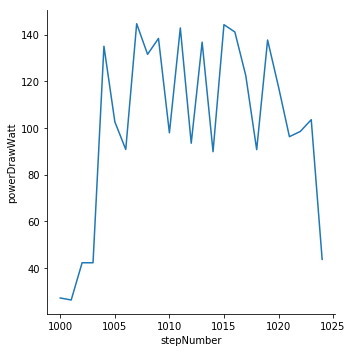

In [21]:
sns.relplot(x='stepNumber', y="powerDrawWatt", kind='line', data=test_gpu_df_plot1)

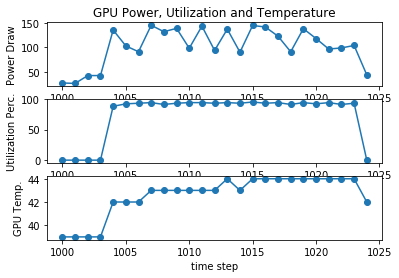

In [55]:
#ax = sns.lineplot(x="stepNumber", y="powerDrawWatt", data=test_gpu_df_plot1)

plt.subplot(3, 1, 1)
plt.plot(test_gpu_df_plot1['stepNumber'], test_gpu_df_plot1['powerDrawWatt'], 'o-')
plt.title('GPU Power, Utilization and Temperature')
plt.ylabel('Power Draw')

plt.subplot(3, 1, 2)
plt.plot(test_gpu_df_plot1['stepNumber'], test_gpu_df_plot1['gpuUtilPerc'], 'o-')
plt.ylabel('Utilization Perc.')

plt.subplot(3, 1, 3)
plt.plot(test_gpu_df_plot1['stepNumber'], test_gpu_df_plot1['gpuTempC'], 'o-')
plt.xlabel('time step')
plt.ylabel('GPU Temp.')

plt.show()

In [47]:
tilelevel_per_task = pd.DataFrame(list(df_task_gpu_tile['tilexy']))
tilelevel_per_task

,level,x,y
0,12,14,83


In [66]:
taskXYset = db.taskXY
taskXYset_level8 = pd.DataFrame(list(taskXYset.find({'level': 8})))
#taskXYset_level8['taskId']

In [68]:
taskidset2 = pd.DataFrame(list(taskset.find({'eventName': 'Render', 'taskid': { '$in': list(taskXYset_level8['taskId']) }})))
taskidset2 = taskidset2.sort_values(by=['duration'])
taskidset2 = taskidset2.reset_index(drop=True)
taskidset2['stepNumber'] = taskidset2.index + 1000
taskidset2

,_id,duration,eventName,startTime,stopTime,taskid,stepNumber
0,5c3e79da7653792483ef482e,22880.0,Render,2018-11-08 07:41:50.165000,2018-11-08 07:42:13.045000,fb9f46a2-a940-4773-996f-6db2204350d2,1000
1,5c3e89ce7653792483f0bf33,23255.0,Render,2018-11-08 07:41:50.750000,2018-11-08 07:42:14.005000,638044d9-16a0-4ee7-a5e0-b594883fc85c,1001
2,5c3e85817653792483f059e4,23405.0,Render,2018-11-08 07:42:15.954000,2018-11-08 07:42:39.359000,58ed7e09-f8d5-4745-a11d-148299bc2e9d,1002
3,5c3eaaaf7653792483f3c67e,23510.0,Render,2018-11-08 07:42:15.033000,2018-11-08 07:42:38.543000,3db75c4b-e0be-4a77-a1a0-b8077be2e5e7,1003
4,5c3e91a47653792483f1784c,23521.0,Render,2018-11-08 07:42:09.909000,2018-11-08 07:42:33.430000,5d1e1704-46cb-44c3-bbeb-1fc13f238317,1004
5,5c3e8f1a7653792483f13c60,24486.0,Render,2018-11-08 07:41:50.161000,2018-11-08 07:42:14.647000,38ea5505-6869-4ded-9b08-e47714015f0a,1005
6,5c3e85be7653792483f05f75,26202.0,Render,2018-11-08 07:42:32.856000,2018-11-08 07:42:59.058000,c21a045f-acb5-4ec3-b834-fc8ed4e63ccd,1006
7,5c3e7d307653792483ef96da,28891.0,Render,2018-11-08 07:42:27.828000,2018-11-08 07:42:56.719000,ff1758b0-0a39-4f72-be8e-8ead79d691a6,1007
8,5c3ea1e87653792483f2f84d,29346.0,Render,2018-11-08 07:42:31.816000,2018-11-08 07:43:01.162000,04cf0a46-41b7-4970-bd4f-84968b151ed4,1008
9,5c3e88487653792483f09b3e,29783.0,Render,2018-11-08 07:42:12.647000,2018-11-08 07:42:42.430000,2b0c31b3-df35-4b7e-9130-499e2e963969,1009


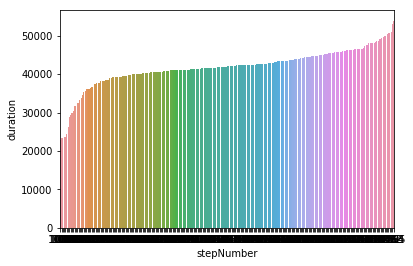

In [70]:
sns.barplot(x = 'stepNumber', y='duration', data=taskidset2)

lowest = fb9f46a2-a940-4773-996f-6db2204350d2
highest = 5e0c7e56-dd20-413f-ad75-feda4ccf17b2	

In [87]:
lowest_task_duratin_df = pd.DataFrame(list(task_gpu_tile_set.find({'taskid': 'fb9f46a2-a940-4773-996f-6db2204350d2'})))
gpu_lowest_duration_df = pd.DataFrame(list(lowest_task_duratin_df['gpu']))
json3 = json.loads(gpu_lowest_duration_df.to_json(orient='records'))[0]
gpu_lowest_duration_df = pd.DataFrame(json3)
gpu_lowest_duration_df = gpu_lowest_duration_df.T
gpu_lowest_duration_df = gpu_lowest_duration_df.sort_values(by=['timestamp'])
gpu_lowest_duration_df = gpu_lowest_duration_df.reset_index(drop=True)
gpu_lowest_duration_df['stepNumber'] = gpu_lowest_duration_df.index + 1000

highest_task_duratin_df = pd.DataFrame(list(task_gpu_tile_set.find({'taskid': '8678ac52-d86e-4789-a799-9e8970015ede'})))
gpu_highest_duration = pd.DataFrame(list(highest_task_duratin_df['gpu']))
json4 = json.loads(gpu_highest_duration.to_json(orient='records'))[0]
gpu_highest_duration = pd.DataFrame(json4)
gpu_highest_duration = gpu_highest_duration.T
gpu_highest_duration = gpu_highest_duration.sort_values(by=['timestamp'])
gpu_highest_duration = gpu_highest_duration.reset_index(drop=True)
gpu_highest_duration['stepNumber'] = gpu_highest_duration.index + 1000


In [88]:
gpu_lowest_duration_df

,gpuMemUtilPerc,gpuSerial,gpuTempC,gpuUUID,gpuUtilPerc,powerDrawWatt,timestamp,stepNumber
0,0,323617020145,30,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,0,25.25,2018-11-08T07:41:50.886Z,1000
1,0,323617020145,30,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,0,25.25,2018-11-08T07:41:52.905Z,1001
2,0,323617020145,30,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,0,34.96,2018-11-08T07:41:54.922Z,1002
3,21,323617020145,31,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,33,61.81,2018-11-08T07:41:56.938Z,1003
4,33,323617020145,32,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,81,69.69,2018-11-08T07:41:58.956Z,1004
5,32,323617020145,33,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,79,79.02,2018-11-08T07:42:00.975Z,1005
6,33,323617020145,33,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,83,82.39,2018-11-08T07:42:02.991Z,1006
7,33,323617020145,33,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,84,70,2018-11-08T07:42:05.008Z,1007
8,33,323617020145,33,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,83,86.05,2018-11-08T07:42:07.024Z,1008
9,34,323617020145,34,GPU-2243dab0-5b0e-f855-d6fa-b703042b07ff,84,57.54,2018-11-08T07:42:09.042Z,1009


In [89]:
gpu_highest_duration

,gpuMemUtilPerc,gpuSerial,gpuTempC,gpuUUID,gpuUtilPerc,powerDrawWatt,timestamp,stepNumber
0,0,323217056367,32,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,0,25.56,2018-11-08T07:42:08.498Z,1000
1,0,323217056367,32,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,0,25.46,2018-11-08T07:42:10.519Z,1001
2,0,323217056367,33,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,0,40.97,2018-11-08T07:42:12.536Z,1002
3,13,323217056367,34,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,34,119.58,2018-11-08T07:42:14.552Z,1003
4,33,323217056367,36,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,92,88.75,2018-11-08T07:42:16.569Z,1004
5,22,323217056367,36,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,98,108.09,2018-11-08T07:42:18.591Z,1005
6,34,323217056367,36,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,97,110.47,2018-11-08T07:42:20.608Z,1006
7,34,323217056367,36,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,97,75.09,2018-11-08T07:42:22.625Z,1007
8,26,323217056367,37,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,92,96.92,2018-11-08T07:42:24.642Z,1008
9,45,323217056367,37,GPU-ecb34587-4a73-360d-dd03-cb78823e0a96,93,70.03,2018-11-08T07:42:26.659Z,1009
